# Ford GoBike Analysis 
## by Justin Foster

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area called "Ford GoBike". Ford Gobike was created by the Ford motor company in partnership with the company "Motivate" and introduced to the San Fransisco Bay Area in 2017. The goal of the system is to help reduce trafic congestion in the city by providing an alternative mode of transportation. More information on this system can be located on Ford's media website [HERE](https://media.ford.com/content/fordmedia/fna/us/en/news/2017/06/27/ford-gobike-launching-in-bay-area-bike-sharing.html).

## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import random

%matplotlib inline

In [4]:
df= pd.read_csv('fordgobike_tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.shape

(183412, 16)

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Cleaning Data Set

> The following changes to the dataset will help make data more intuitive and help streamline analysis.
* The 'duration_sec' column should list minutes instead and its name should be changed it 'minutes'
* Extract the day of the week from 'start_time' info to create a column called, 'weekday' and update the data type to category.
* Drop rows with null values in 'member_birth_year' column. Calculate age in years by subtracting the birth year from the dataset's year of 2019. Save this column as 'age' with an int64 data type.
* Change 'user_type' data type to category
* Change 'member_gender' column name to 'gender' and update data type to category
* Change 'bike_share_for_all_trip' column name to 'low_income'and set data type to category.
* Drop all station name, id, longitude, and latitude columns as well as they will not be used.
* Drop start and end time columns.
* Drop 'bike_id' column
* Drop 'start_time' and 'end_time' columns
* Drop 'member_birth_year'
* Limit 'age' to 90 years of age
* Limit 'minutes' to 120 minutes for the trip

#### Make a copy of the dataset before cleaning or altering.

In [9]:
trips= df.copy()
trips.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
163596,368,2019-02-05 09:11:07.8910,2019-02-05 09:17:16.2580,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,5014,Subscriber,NaN,NaN,No


#### The 'duration_sec' column should list minutes instead and its name should be changed it 'minutes'. Update data type to int64.

In [10]:
# Divide seconds by 60 to get minutes.
trips['duration_sec']= trips['duration_sec']/60

In [11]:
# Rename the column to reflect it is showing minutes of trip instead of seconds.
trips.rename(columns= {'duration_sec':'minutes'}, inplace= True)

In [12]:
# Change dtype to integer for cleaner view.
trips['minutes']= trips['minutes'].astype('int64')

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [13]:
trips['minutes'].dtype

dtype('int64')

In [14]:
trips.sample()

,minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
53269,4,2019-02-21 16:09:47.5160,2019-02-21 16:14:30.7550,16.0,Steuart St at Market St,37.79413,-122.39443,6.0,The Embarcadero at Sansome St,37.80477,-122.403234,5852,Subscriber,1982.0,Male,No


#### Extract the day of the week from 'start_time' info to create a column called, 'weekday' and update the data type to category.

In [15]:
# Update column to a datetime dtype
trips['start_time']= pd.to_datetime(trips['start_time'])

In [16]:
# Create new column called 'weekday' and extract day of the week
trips['weekday'] = trips['start_time'].dt.strftime('%A')

In [17]:
# Update dtype to category
trips['weekday']= trips['weekday'].astype('category')

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [18]:
trips.sample()

,minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday
165649,7,2019-02-05 05:53:51.083,2019-02-05 06:01:32.8030,370.0,Jones St at Post St,37.787327,-122.413278,26.0,1st St at Folsom St,37.78729,-122.39438,5173,Subscriber,1990.0,Male,No,Tuesday


In [19]:
trips['weekday'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: weekday, dtype: int64

In [20]:
trips.sample(12)

,minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday
46477,3,2019-02-22 09:47:42.451,2019-02-22 09:51:37.8740,98.0,Valencia St at 16th St,37.765052,-122.421866,75.0,Market St at Franklin St,37.773793,-122.421239,2353,Subscriber,1995.0,Male,No,Friday
171308,5,2019-02-03 21:43:23.665,2019-02-03 21:48:25.6170,31.0,Raymond Kimbell Playground,37.783813,-122.434559,74.0,Laguna St at Hayes St,37.776435,-122.426244,4382,Subscriber,1991.0,Male,No,Sunday
164557,4,2019-02-05 08:23:54.171,2019-02-05 08:28:35.0710,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4640,Subscriber,1989.0,Male,No,Tuesday
180481,4,2019-02-01 10:58:59.611,2019-02-01 11:03:37.2780,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,246.0,Berkeley Civic Center,37.869060,-122.270556,2745,Subscriber,1996.0,Male,No,Friday
71588,14,2019-02-19 17:14:50.312,2019-02-19 17:29:46.6870,369.0,Hyde St at Post St,37.787349,-122.416651,119.0,18th St at Noe St,37.761047,-122.432642,6296,Subscriber,1974.0,Female,No,Tuesday
49524,4,2019-02-21 21:24:06.173,2019-02-21 21:28:21.4850,64.0,5th St at Brannan St,37.776754,-122.399018,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,4822,Subscriber,1993.0,Male,No,Thursday
130035,6,2019-02-09 20:26:28.143,2019-02-09 20:32:37.4230,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,308.0,San Pedro Square,37.336802,-121.894090,2902,Subscriber,1979.0,Male,No,Saturday
134567,10,2019-02-08 17:09:50.300,2019-02-08 17:20:23.2050,340.0,Harmon St at Adeline St,37.849735,-122.270582,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,5096,Subscriber,1998.0,Male,Yes,Friday
147469,4,2019-02-07 07:51:51.069,2019-02-07 07:56:28.4880,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,321.0,5th St at Folsom,37.780146,-122.403071,5418,Subscriber,1992.0,Female,No,Thursday
38010,5,2019-02-23 12:56:58.134,2019-02-23 13:02:04.5970,80.0,Townsend St at 5th St,37.775235,-122.397437,364.0,China Basin St at 3rd St,37.772000,-122.389970,5091,Subscriber,1981.0,Male,No,Saturday


#### Change 'user_type' data type to category

In [21]:
# Change dtype of 'user_type' column to be category
trips['user_type']= trips['user_type'].astype('category')

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [22]:
trips['user_type'].dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

#### Drop rows with null values in 'member_birth_year' column. Calculate age in years by subtracting the birth year from the dataset's year of 2019. Save this column as 'age' with an int64 data type.

In [23]:
# Drop null values for 'member_birth_year'
trips.dropna(axis=0, subset=['member_birth_year'], inplace= True)

In [24]:
# Convert dtype to int64
trips['member_birth_year']= trips['member_birth_year'].astype('Int64')

In [25]:
# Create 'age' column by subtracting member birth year from 2019
trips['age']= 2019-trips['member_birth_year']

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [26]:
trips.sample()

,minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,age
91995,5,2019-02-15 20:47:56.446,2019-02-15 20:53:28.7240,109.0,17th St at Valencia St,37.763316,-122.421904,122.0,19th St at Mission St,37.760299,-122.418892,4942,Subscriber,1993,Male,No,Friday,26


In [27]:
trips['age'].dtype

Int64Dtype()

#### Change 'member_gender' column name to 'gender' and update data type to category

In [28]:
trips['member_gender']= trips['member_gender'].astype('category')

In [29]:
trips.rename(columns= {'member_gender':'gender'}, inplace= True)

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [30]:
trips['gender'].dtype

CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False)

#### Change 'bike_share_for_all_trip' column name to 'low_income' and set data type to category.

In [31]:
# Change column name to 'low_income'
trips.rename(columns= {'bike_share_for_all_trip':'low_income'}, inplace= True)

In [32]:
# set dtype as category
trips['low_income']= trips['low_income'].astype('category')

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [33]:
trips.sample()

,minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,gender,low_income,weekday,age
161534,3,2019-02-05 14:39:43.036,2019-02-05 14:43:10.1310,296.0,5th St at Virginia St,37.325998,-121.87712,296.0,5th St at Virginia St,37.325998,-121.87712,4000,Subscriber,1995,Female,Yes,Tuesday,24


In [34]:
trips['low_income'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

#### Drop the following columns:
* start_station_id
* start_station_name
* start_station_latitude
* start_station_longitude
* end_station_id
* end_station_name
* end_station_latitude
* end_station_longitude
* bike_id
* start_time
* end_time
* member_birth_year

In [35]:
trips.drop(['start_station_id',
           'start_station_name',
           'start_station_latitude',
           'start_station_longitude',
           'end_station_id',
           'end_station_name',
           'end_station_latitude',
           'end_station_longitude',
           'bike_id',
           'start_time',
           'end_time',
           'member_birth_year'], axis= 1, inplace= True)

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [36]:
trips.sample()

,minutes,user_type,gender,low_income,weekday,age
156579,30,Subscriber,Male,No,Wednesday,62


#### Limit Age to 90 years of age.

In [37]:
# Drop all age values greater than 90.
trips= trips.drop(trips[(trips['age'] >= 91)].index)

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [38]:
trips['age'].unique()

<IntegerArray>
[35, 47, 30, 45, 60, 36, 31, 27, 23, 26, 29, 38, 44, 41, 28, 22, 33, 19, 37,
 24, 39, 46, 34, 48, 40, 52, 21, 25, 42, 20, 32, 50, 56, 43, 55, 54, 58, 51,
 53, 57, 65, 61, 59, 49, 63, 62, 74, 67, 71, 68, 78, 69, 70, 66, 64, 73, 72,
 88, 76, 77, 86, 18, 75, 85, 80, 89, 81]
Length: 67, dtype: Int64

#### Limit Minutes for trip to 120 minutes

In [39]:
# Drop all minute values greater than 90 minutes
# I originally set this to 120 minutes however, 
# I found it too high a threashold
trips= trips.drop(trips[(trips['minutes'] >= 91)].index)

<h4 style='text-align: center;,'> Test Change(s) <h4/>

In [40]:
trips['minutes'].unique()

array([26, 29, 19, 17,  7,  8,  6,  3,  9, 11, 14, 12,  4, 10,  2,  5, 25,
        1, 24, 57, 52, 15, 13, 50, 49, 23, 20, 18, 35, 30, 32, 27, 21, 83,
       38, 33, 56, 39, 16, 37, 28, 22, 46, 43, 73, 41, 51, 54, 31, 34, 42,
       40, 84, 36, 53, 44, 70, 69, 60, 47, 55, 45, 71, 75, 65, 58, 68, 59,
       67, 72, 86, 78, 63, 48, 85, 74, 79, 81, 80, 89, 76, 62, 66, 88, 90,
       82, 87, 61, 64, 77], dtype=int64)

### New Cleaned Dataset Review

In [41]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174268 entries, 4 to 183411
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   minutes     174268 non-null  int64   
 1   user_type   174268 non-null  category
 2   gender      174268 non-null  category
 3   low_income  174268 non-null  category
 4   weekday     174268 non-null  category
 5   age         174268 non-null  Int64   
dtypes: Int64(1), category(4), int64(1)
memory usage: 4.8 MB


In [42]:
trips.describe()

,minutes,age
count,174268.000000,174268.000000
mean,10.028841,34.152208
std,8.237626,9.964754
min,1.000000,18.000000
25%,5.000000,27.000000
50%,8.000000,32.000000
75%,13.000000,39.000000
max,90.000000,89.000000


In [43]:
trips.shape

(174268, 6)

In [44]:
trips.to_csv('trips.csv', index= False)

### What is the structure of your dataset?

> After cleaning the original data set, there are 174538 listed trips with 6 columns of information available about each trip. Below is a list of each column and a brief description of the information the column conveys:
* **minutes** - Number of minutes the trip lasted.               
* **user_type** - Indicates if a user is a service subscriber or a general public customer       
* **gender** - Indicates the gender of the user
* **low_income** - Indicates if the user is enrolled in the Ford GoBike "Bike Share For All" program which provides a discounted rate to lower income users.
* **month** - Indicates the month of the year the trip was taken.              
* **age** - Indicates the age in years that the user was during the trip.  

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in this dataset for me is 'user_type'. I am interested to see the various demographics' similarities and/or differences between subscribers and customers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I have removed nonessential columns from the original data set that would not support my investigation into my feature of interest. Of both user types, I would like to examine gender, age, low income status, and length of trip as supporting features.

## Univariate Exploration

In [80]:
def uni_bar(df,x,title,xlab,ylab):
    #This will speed creating univatiate bar graphs
    weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    base_color = sb.color_palette()[0]
    plt.figure(figsize=(9,7))
    sb.countplot(data= df, x= x, color= base_color, order= weekday_order)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab);

In [81]:
def uni_hist(x,adjuster,df,title,xlab,ylab):
    #This will speed creating univatiate histograms
    bins = np.arange(0, x.max()+adjuster, adjuster)
    plt.figure(figsize=(9,7))
    plt.hist(x= x, bins= bins, edgecolor= 'black')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab);

In [82]:
def uni_pie(column,title):
    # This will speed creating univariate pie charts
    sorted_counts= trips[column].value_counts()
    plt.figure(figsize=(9,7))
    plt.pie(sorted_counts,
            labels= sorted_counts.index,
            autopct='%1.0f%%',
            pctdistance= .8,
            shadow= False,
            startangle = 90,
            counterclock = False,
            wedgeprops={"edgecolor":"black",'linewidth': .5, 'antialiased': True});
    plt.title(title, fontsize= 15);

### What percentage of all users are subscribers vs customers?

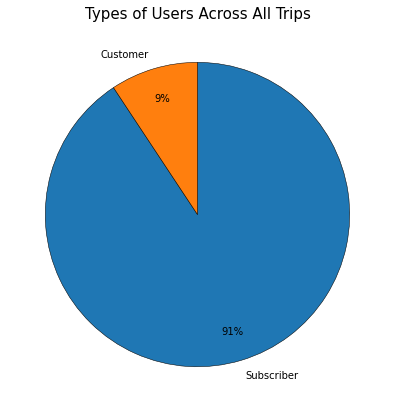

In [83]:
uni_pie('user_type',
        'Types of Users Across All Trips')

##### Observation: 
* It appears that just over 90% of users are subscribers and just under 10% of users are one time customers. This may indicate Ford GoBike is more popular with individuals using it as the intended alternative mode of transportation as opposed to a quick bike rental.

### What is the gender composition of all users?

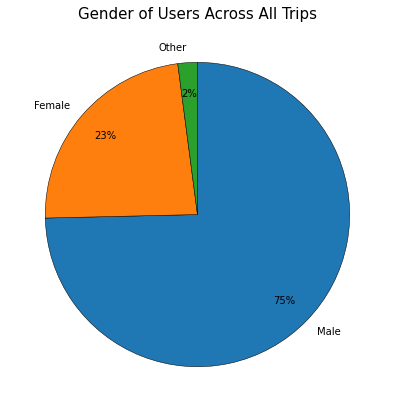

In [84]:
uni_pie('gender',
        'Gender of Users Across All Trips')

##### Observation: 
* It appears the majority of Ford GoBike users are male at a 75% user composition. 25% of users are female. There is a remaining 2% listed as other. 

### What percent of users are utilizing the low income discount rate?

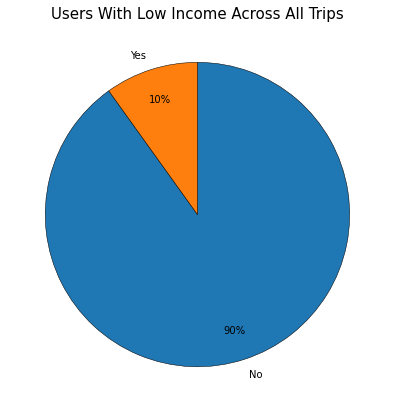

In [85]:
uni_pie('low_income',
        'Users With Low Income Across All Trips')

##### Observation: 
* It appears there are about 10% of users who utilize the "Bike Share For All" discount rate for low income users of Ford GoBike.

### What is the age distribution across all users?

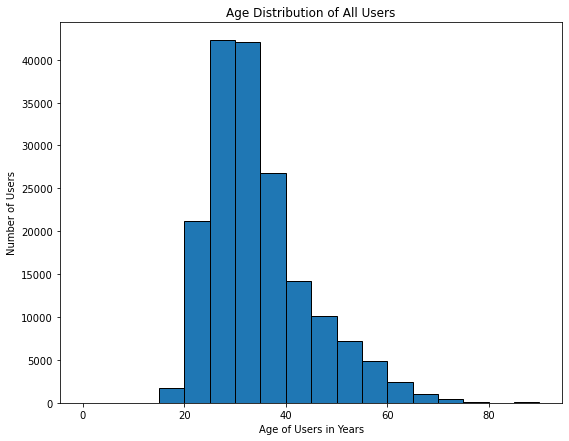

In [86]:
uni_hist(trips['age'],
         5,
         trips,
         "Age Distribution of All Users",
         "Age of Users in Years",
         "Number of Users")

##### Observation: 
* The distribution of age is right skewed. A larger concentration of users appear to fall between the ages of 25 and 35 years old. There is a significant drop of of users after the age of 35.

### What is the distribution of minutes taken on each trip?

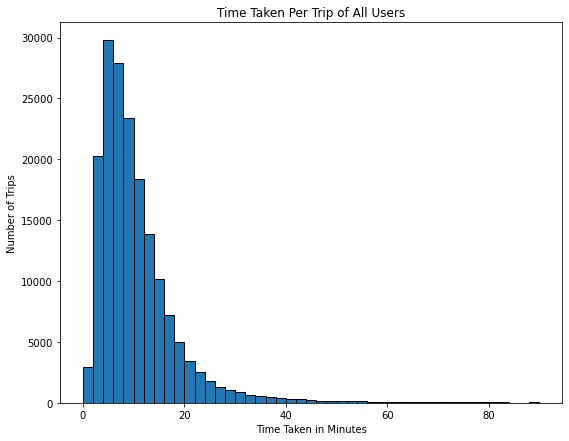

In [87]:
uni_hist(trips['minutes'],
         2,
         trips,
         "Time Taken Per Trip of All Users",
         "Time Taken in Minutes",
         "Number of Trips")

##### Observation: 
* There is a right skew in the distribution of time taken per trip in minutes. Users tend to mostly ride between 2 and 12 minutes with the highest concentration of rides taking place within 4 to 8 minutes.


### How many trips did users take each day of the week?

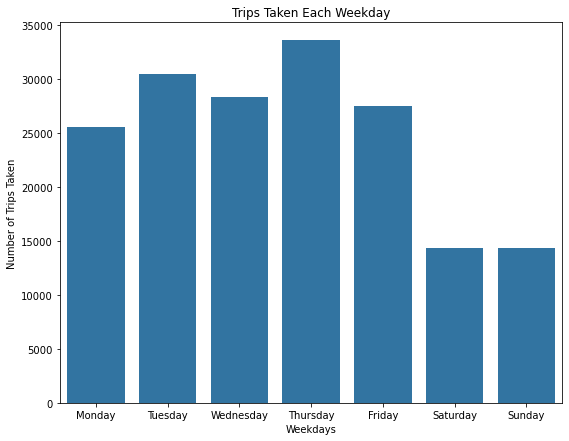

In [88]:
uni_bar(trips,
        trips['weekday'],
        'Trips Taken Each Weekday',
        'Weekdays',
        'Number of Trips Taken')

##### Observation: 
* It appears as though the weekend days see much less utilization of the Ford GoBikes system thank their weekday counterparts. Thursday sees the highest number of trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My variable of interest is 'user_type'. I had done thourough preliminary cleaning so no transformations were needed for this variable. While there were no unusual points, I was suprised to see only 9% of users were general customers and so many users were true subsribers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I was suprised to see that both of my selected quantatative variables I kept for my dataset had right skewed distributions. There were a couple outliers that needed cleaning with them as well to avoid unrealistic age outliers as well as trip time outliers. After reducing a maximum trip time to 120, I found after plotting a histogram that I needed to reduce the maximum even further to get a more readable and useful plot. 

## Bivariate Exploration

In [68]:
def bi_catplot(df,x,y,title,xlab,ylab):
    # Used to create grouped box plots with a quantatative and qualitative variable quicker
    plt.figure(figsize=(9,7))
    sb.catplot(data = df, x = x, y = y, kind= 'bar')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab);

In [69]:
def bi_clusterbar(df,x,hue,title,xlab,ylab):
    # Used to create grouped box plots with two categorical data variables  quicker
    base_color = sb.color_palette()[0]
    plt.figure(figsize=(9,7))
    sb.countplot(data= df, x= x, hue= hue)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab);

### What distribution of User Types are low income status?

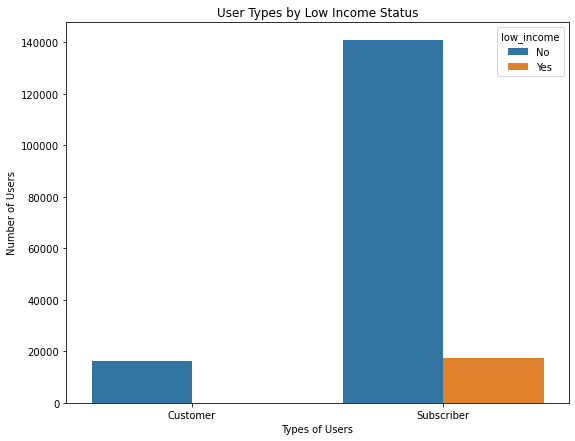

In [70]:
bi_clusterbar(trips,
              'user_type',
              'low_income',
              'User Types by Low Income Status',
              'Types of Users',
              'Number of Users')

##### Observation: 
* This is what I would expect to see. In order to have data on low income status, a user should be utilizing the "Ride Share for All" program. In order to participate in this program, one would have to be subscribed. If any low income users appeared in the Customer side, this could indicate an issue with our data.


### What is the gender distribution of the low income users?

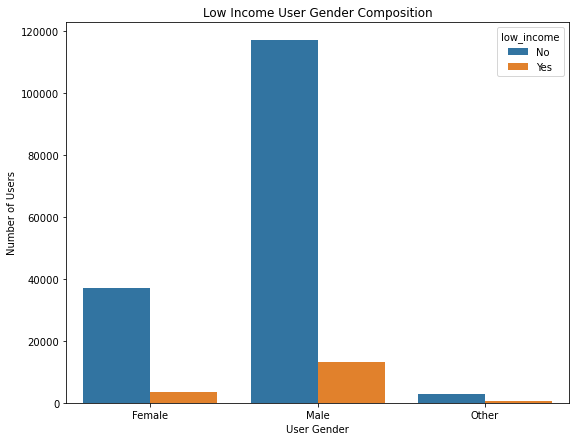

In [71]:
bi_clusterbar(trips,
              'gender',
              'low_income',
              'Low Income User Gender Composition',
              'User Gender',
              'Number of Users')

##### Observation: 
* It appears that there is a higher concentration of male users with a low income status as opposed to both female and other genders combined.

### What is the gender composition for all user types?

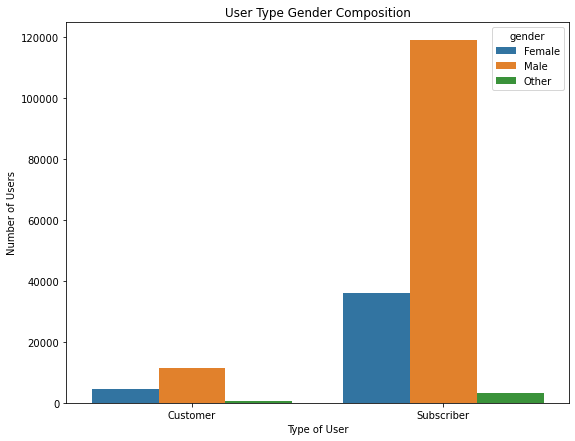

In [72]:
bi_clusterbar(trips,
              'user_type',
              'gender',
              'User Type Gender Composition',
              'Type of User',
              'Number of Users')

##### Observation: 
* There appears to be a large majority of male subscribers as well as general customers.

### How many trips do the different user types take each weekday?

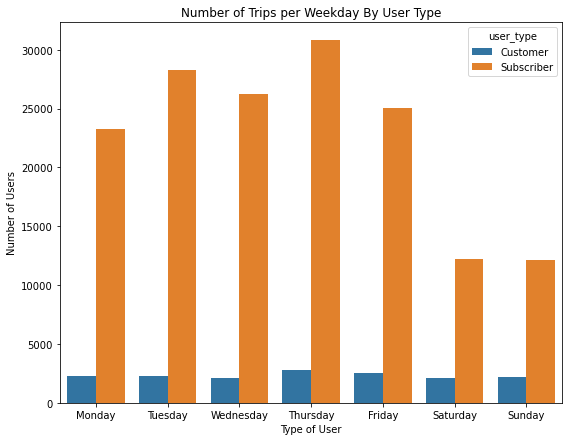

In [79]:
weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(9,7))
sb.countplot(data= trips, x= 'weekday', hue= 'user_type', order= weekday_order)
plt.title('Number of Trips per Weekday By User Type')
plt.xlabel('Type of User')
plt.ylabel('Number of Users');

##### Observation: 
* Here we can see that both subscribers and general customers seem to take the most trips on Thursdays. 
* Customers appear to have fairly consistent amounts of trips on all other days.
* Subscribers seem to have fairly consistent amounts of trips for their population size until the weekend in which their amount of trips take a significant decrease

### Is there a correlation between the age of users and the amount of minutes their trips take?

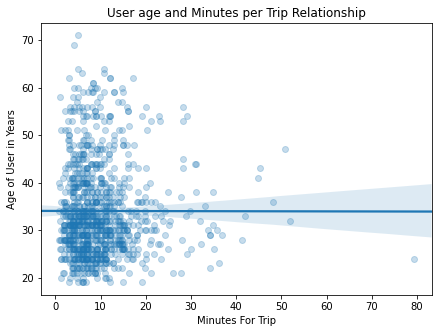

In [74]:
x= trips['minutes'].sample(1000)
y= trips['age'].sample(1000)
plt.figure(figsize=(7,5))
sb.regplot(x= x, y= y, x_jitter= 0.3, scatter_kws={'alpha' : 1/4})
plt.title('User age and Minutes per Trip Relationship')
plt.xlabel('Minutes For Trip')
plt.ylabel('Age of User in Years');

##### Observation: 
* There appears to be an ever so slight negative correlation between age of a user and minutes taken in a trip. I had expected to see a more noticable negative correlation. This indicates age is not much of a factor in determining the length of time a trip is going to take. 

### Do User Types have different concentrations of minutes taken for their trips?

<Figure size 648x504 with 0 Axes>

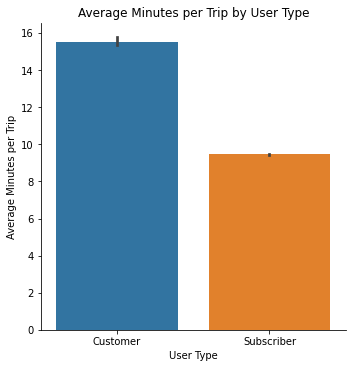

In [75]:
bi_catplot(trips,
          'user_type',
          'minutes',
          'Average Minutes per Trip by User Type',
          'User Type',
          'Average Minutes per Trip')

##### Observation: 
* Subscribers appear to have a tighter concentration of their trip length than customers do. This could be due to taking more regular trips than a collection of random "one-off" customers.

### Do User Types have different concentrations in age composition?

<Figure size 648x504 with 0 Axes>

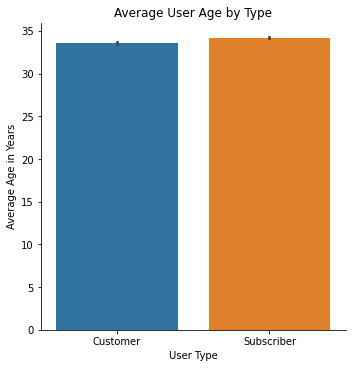

In [76]:
bi_catplot(trips,
          'user_type',
          'age',
          'Average User Age by Type',
          'User Type',
          'Average Age in Years')

##### Observation: 
* The average age of both user types is extremely close. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I was very suprised to see that the two user types share very similar distributions across most of the various features. For example gender distributions were nearly identical even though there are so fewer general customers than there are subscribers. Even in the quantitative metric of average age was nearly identical for the two user types. The biggest difference I was able to find was in the average length (in minutes) of a trip between the two user types. Customers appear to take typically longer trips than subscribers do. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found it interesting that there was nearly no correlation between age and minutes per trip. I had suspected that the older a user was, the shorter amount of time their trip would take. There was an ever so slight negative correlation, but I expected to see a much more defined negative correlation than what I found. I also thought the composition of low income status users by gender was interesting. There were far more males than female and other genders combined. I would have assumed a more even split. 

## Multivariate Exploration

<Figure size 504x648 with 0 Axes>

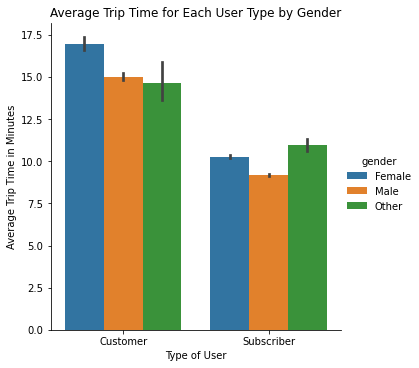

In [91]:
plt.figure(figsize=(7,9))
sb.catplot(data= trips, x= 'user_type', y= 'minutes', hue= 'gender', kind='bar')
plt.title('Average Trip Time for Each User Type by Gender')
plt.xlabel('Type of User')
plt.ylabel('Average Trip Time in Minutes');

<Figure size 504x648 with 0 Axes>

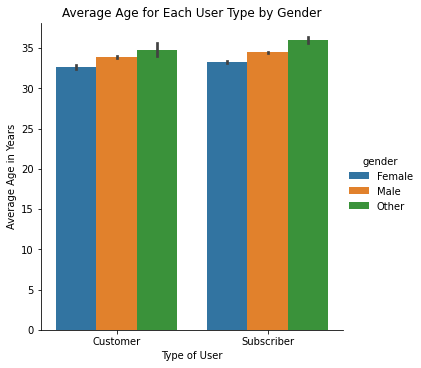

In [93]:
plt.figure(figsize=(7,9))
sb.catplot(data= trips, x= 'user_type', y= 'age', hue= 'gender', kind='bar')
plt.title('Average Age for Each User Type by Gender')
plt.xlabel('Type of User')
plt.ylabel('Average Age in Years');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> While it was originally discovered that there is a predominantly male user base, we can see that introducing additional quantatative variables of age and minutes per trip, all the genders are fairly comperable in their averages in these areas. Measuring the various quantatative averages available strengthens findings in previous sections about the trends of the gvarious genders inside each user type. 

### Were there any interesting or surprising interactions between features?

> I found it suprising that the average age of each gender was fairly similar across both subscribers and customers. Especially with such a large gender representation discrepancy. I would have suspected a much larger difference in average age. 

## Conclusions
* There are significantly more Subscriber users as there are Customer users. 
* There are significantly more male users than female and/or other gendered users. This is true of both user types.
* The average age of all users regardless of gender or user type is about 33 to 35 years old.
* Subscribers have many more trips than Customers but their average trip takes less time than that of the average trip for a customer. 
* Female users' trips take more time on average than male users for both user types.
* There are far fewer trips taken on the weekend days of the week. Customers remain consistent with their typical amount of trips , however, Subscribers see a drastic decrease in amount of trips. 

